In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/DavorAnd/BDS-Phyton/main/bank_marketing.csv') # Reading the file

# Feature selection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.head(15) # looking at first 15 rows of data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.isna().sum() # Checking if there are any missing values in the dataset

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.columns #Cheking the columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
df.poutcome.unique() # Looking which values poutcome row has

array(['nonexistent', 'failure', 'success'], dtype=object)

In [8]:
# merge the loans into one column and dropping the housing and loan
df['loans'] = df.apply(lambda row: any(row== "yes"), axis=1)
df = df.drop(['housing','loan'], axis=1)

In [9]:
df = df[df.ne('unknown').all(axis =1)] # dropping all the unknown values in the dataframe


In [10]:
# Turning yes no values in dataset into boolean True/False
mapping = {'no':False,'yes':True}
df.replace({"y"  :mapping}, inplace=True)
df.replace({"default" :mapping}, inplace= True)

In [11]:
df.head()
df.education = df.education.str.replace('.',' ')

<ipython-input-11-8abb6546075d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.education = df.education.str.replace('.',' ')


In [12]:
df.head(10)

,age,job,marital,education,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,loans
0,56,housemaid,married,basic 4y,False,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,False
2,37,services,married,high school,False,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,True
3,40,admin.,married,basic 6y,False,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,False
4,56,services,married,high school,False,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,True
6,59,admin.,married,professional course,False,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,False
8,24,technician,single,professional course,False,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,True
9,25,services,single,high school,False,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,True
11,25,services,single,high school,False,telephone,may,mon,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,True
12,29,blue-collar,single,high school,False,telephone,may,mon,137,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,True
13,57,housemaid,divorced,basic 4y,False,telephone,may,mon,293,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,True


In [13]:
df_clean = df.drop(columns=['contact','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], axis=1)

In [14]:
df_clean.columns

Index(['age', 'job', 'marital', 'education', 'default', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'loans'],
      dtype='object')

In [15]:
df_clean.y.value_counts()

False    27277
True      3950
Name: y, dtype: int64

# Feature Engineering and Standard ML Preprocessing

In [16]:
df_num = df_clean[['age','duration','campaign','pdays','previous']]
df_cat = df_clean[['job', 'marital','education','default', 'month','day_of_week', 'poutcome', 'y', 'loans']]

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder = LabelEncoder()

In [19]:
df_clean['job_id'] = encoder.fit_transform(df_clean['job'])
df_clean['marital_id'] = encoder.fit_transform(df_clean['marital'])
df_clean['education_id'] = encoder.fit_transform(df_clean['education'])
df_clean['default_id'] = encoder.fit_transform(df_clean['default'])
df_clean['month_id'] = encoder.fit_transform(df_clean['month'])
df_clean['day_of_week_id'] = encoder.fit_transform(df_clean['day_of_week'])
df_clean['poutcome_id'] = encoder.fit_transform(df_clean['poutcome'])
df_clean['loans_id'] = encoder.fit_transform(df_clean['loans'])
df_clean['y_id'] = encoder.fit_transform(df_clean['y'])

In [20]:
df_f = df_clean.drop(columns=['job', 'marital','education','default', 'month','day_of_week', 'poutcome', 'y', 'loans'])

In [21]:
df_f.head(5)

,age,duration,campaign,pdays,previous,job_id,marital_id,education_id,default_id,month_id,day_of_week_id,poutcome_id,loans_id,y_id
0,56,261,1,999,0,3,1,0,0,6,1,1,0,0
2,37,226,1,999,0,7,1,3,0,6,1,1,1,0
3,40,151,1,999,0,0,1,1,0,6,1,1,0,0
4,56,307,1,999,0,7,1,3,0,6,1,1,1,0
6,59,139,1,999,0,0,1,5,0,6,1,1,0,0


In [22]:
from sklearn.preprocessing import MinMaxScaler


In [23]:
scaler = MinMaxScaler()
scaler.fit(df_f)
scaled_data = scaler.transform(df_f)

# Convert the scaled data array back to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=df_f.columns)

In [24]:
scaled_data_df

,age,duration,campaign,pdays,previous,job_id,marital_id,education_id,default_id,month_id,day_of_week_id,poutcome_id,loans_id,y_id
0,0.500000,0.053070,0.000000,1.0,0.000000,0.3,0.5,0.000000,0.0,0.666667,0.25,0.5,0.0,0.0
1,0.256410,0.045954,0.000000,1.0,0.000000,0.7,0.5,0.500000,0.0,0.666667,0.25,0.5,1.0,0.0
2,0.294872,0.030704,0.000000,1.0,0.000000,0.0,0.5,0.166667,0.0,0.666667,0.25,0.5,0.0,0.0
3,0.500000,0.062424,0.000000,1.0,0.000000,0.7,0.5,0.500000,0.0,0.666667,0.25,0.5,1.0,0.0
4,0.538462,0.028264,0.000000,1.0,0.000000,0.0,0.5,0.833333,0.0,0.666667,0.25,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31222,0.717949,0.067914,0.000000,1.0,0.000000,0.5,0.5,0.833333,0.0,0.777778,0.00,0.5,1.0,1.0
31223,0.371795,0.077877,0.000000,1.0,0.000000,0.1,0.5,0.833333,0.0,0.777778,0.00,0.5,0.0,0.0
31224,0.500000,0.038430,0.023810,1.0,0.000000,0.5,0.5,1.000000,0.0,0.777778,0.00,0.5,1.0,0.0
31225,0.346154,0.089874,0.000000,1.0,0.000000,0.9,0.5,0.833333,0.0,0.777778,0.00,0.5,1.0,1.0


# Train and Test Split

In [25]:

X = scaled_data_df.iloc[:,0:13]
y = scaled_data_df.iloc[:,13]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)


# Assuming X_train and y_train are your training data and labels
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)


In [29]:
y_train_resampled.value_counts()

0.0    3165
1.0    3165
Name: y_id, dtype: int64

# Defining a Neural Network Architecture in Pytorch

In [30]:
import torch

In [31]:
X_train_tensor = torch.tensor(X_train_resampled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Defining a Training Loop

# Training the Model

In [32]:
from tqdm import tqdm_notebook

In [33]:
# Initializing Hyperparameters
epochs = 10
learning_rate = 0.05

# # Initializing Parameters
w = 50

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net1 = torch.nn.Sequential(torch.nn.Linear(13, 20),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.30),

                                 torch.nn.Linear(20, 20),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.30),

                                 torch.nn.Linear(20, 1),
                                 torch.nn.Sigmoid()
                                )

# 1.2 Loss Function
loss_BCE = torch.nn.BCELoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_net1.parameters(), lr=learning_rate)


# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_net1.forward(X_train_tensor[i].reshape(1, 13))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad()

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()


      # # Display the loss for the current sample
      # print(f"Epoch {epoch+1}, Sample {i+1}: Loss: {loss.item():.4f}")


    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-33-411397e25572>:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.0217
--------------------------------------------------


Epoch 2 Average Loss: 0.0307
--------------------------------------------------


Epoch 3 Average Loss: 0.0296
--------------------------------------------------


Epoch 4 Average Loss: 0.0260
--------------------------------------------------


Epoch 5 Average Loss: 0.0224
--------------------------------------------------


Epoch 6 Average Loss: 0.0238
--------------------------------------------------


Epoch 7 Average Loss: 0.0223
--------------------------------------------------


Epoch 8 Average Loss: 0.0220
--------------------------------------------------


Epoch 9 Average Loss: 0.0218
--------------------------------------------------


Epoch 10 Average Loss: 0.0235
--------------------------------------------------



In [34]:
import matplotlib.pyplot as plt

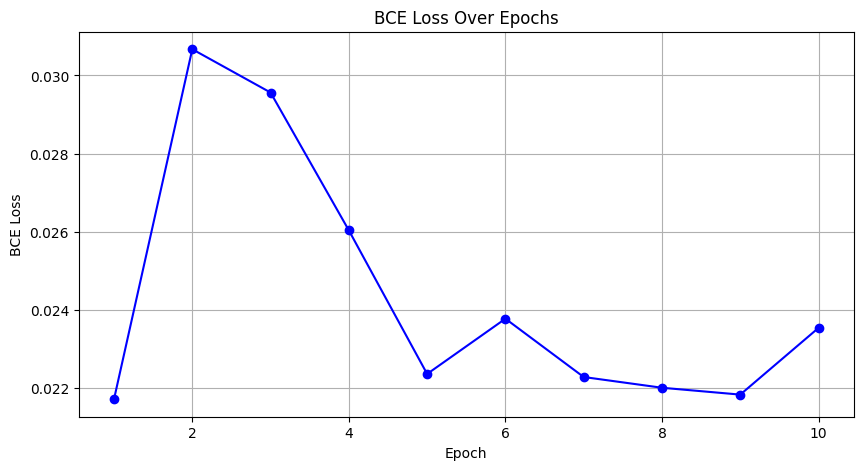

In [35]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('BCE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

# Experimenting with Different Hyperparameters

# Training loop 2

In [36]:
# Initializing Hyperparameters
epochs = 2
learning_rate = 0.01

# # Initializing Parameters
w = 50

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net2 = torch.nn.Sequential(torch.nn.Linear(13, 15),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.30),

                                 torch.nn.Linear(15, 15),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.30),

                                 torch.nn.Linear(15, 1),
                                 torch.nn.Sigmoid()
                                )

# 1.2 Loss Function
loss_BCE = torch.nn.BCELoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_net2.parameters(), lr=learning_rate)


# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_net2.forward(X_train_tensor[i].reshape(1, 13))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad()

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()


      # # Display the loss for the current sample
      # print(f"Epoch {epoch+1}, Sample {i+1}: Loss: {loss.item():.4f}")


    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-36-211cb5cfa802>:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.1434
--------------------------------------------------


Epoch 2 Average Loss: 0.1516
--------------------------------------------------



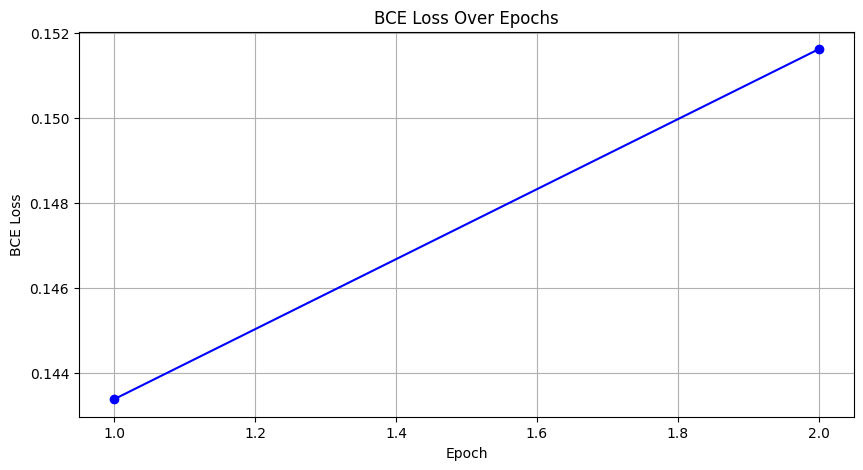

In [37]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('BCE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

# Training loop 3

In [38]:
# Initializing Hyperparameters
epochs = 4
learning_rate = 0.01

# # Initializing Parameters
w = 50

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net3 = torch.nn.Sequential(torch.nn.Linear(13, 20),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.30),

                                 torch.nn.Linear(20, 20),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.30),

                                 torch.nn.Linear(20, 1),
                                 torch.nn.Sigmoid()
                                )

# 1.2 Loss Function
loss_BCE = torch.nn.BCELoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_net3.parameters(), lr=learning_rate)


# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_net3.forward(X_train_tensor[i].reshape(1, 13))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad()

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()


      # # Display the loss for the current sample
      # print(f"Epoch {epoch+1}, Sample {i+1}: Loss: {loss.item():.4f}")


    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-38-84c0770ef5fc>:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/4 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.1065
--------------------------------------------------


Epoch 2 Average Loss: 0.1237
--------------------------------------------------


Epoch 3 Average Loss: 0.0938
--------------------------------------------------


Epoch 4 Average Loss: 0.0758
--------------------------------------------------



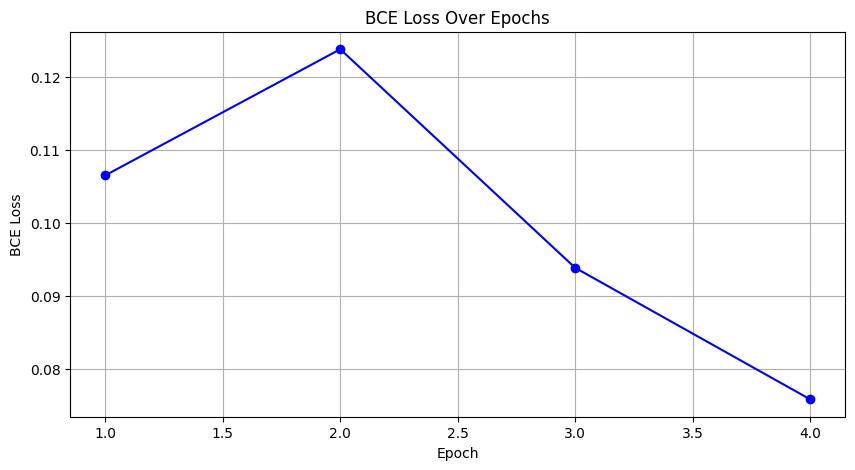

In [39]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('BCE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

# Training loop 4

In [40]:
# Initializing Hyperparameters
epochs = 6
learning_rate = 0.01

# # Initializing Parameters
#w = 50

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net4 = torch.nn.Sequential(torch.nn.Linear(13, 15),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.30),

                                 torch.nn.Linear(15, 15),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.30),

                                 torch.nn.Linear(15, 1),
                                 torch.nn.Sigmoid()
                                )

# 1.2 Loss Function
loss_BCE = torch.nn.BCELoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_net4.parameters(), lr=learning_rate)


# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_net4.forward(X_train_tensor[i].reshape(1, 13))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad()

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()


      # # Display the loss for the current sample
      # print(f"Epoch {epoch+1}, Sample {i+1}: Loss: {loss.item():.4f}")


    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-40-56a5f21edcbc>:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/6 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.1120
--------------------------------------------------


Epoch 2 Average Loss: 0.1121
--------------------------------------------------


Epoch 3 Average Loss: 0.0893
--------------------------------------------------


Epoch 4 Average Loss: 0.0719
--------------------------------------------------


Epoch 5 Average Loss: 0.0634
--------------------------------------------------


Epoch 6 Average Loss: 0.0612
--------------------------------------------------



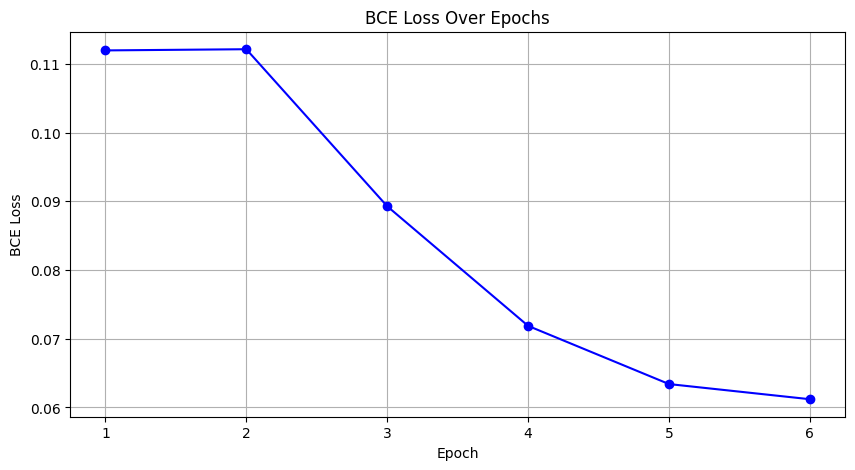

In [41]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('BCE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

# Training loop 5

In [42]:
# Initializing Hyperparameters
epochs = 8
learning_rate = 0.05

# # Initializing Parameters
#w = 50

loss_set = {}

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
model_net5 = torch.nn.Sequential(torch.nn.Linear(13, 20),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.30),

                                 torch.nn.Linear(20, 20),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.30),

                                 torch.nn.Linear(20, 1),
                                 torch.nn.Sigmoid()
                                )

# 1.2 Loss Function
loss_BCE = torch.nn.BCELoss()

# 1.3 Optimization Approach
optimizer = torch.optim.SGD(model_net5.parameters(), lr=learning_rate)


# Loop over the number of epochs
for epoch in tqdm_notebook(range(epochs), desc="Epochs"):
    epoch_loss = 0.0

    # Loop over each sample in the dataset
    for i in range(X_train_tensor.size(0)):

      # 2. Forward Pass
      output = model_net5.forward(X_train_tensor[i].reshape(1, 13))

      # 3. FeedForward Evaluation
      loss = loss_BCE(output, y_train_tensor[i].reshape(1, 1))
      optimizer.zero_grad()

      # 4. Backward Pass / Gradient Calculation
      loss.backward()

      # Store the loss for each epoch
      epoch_loss += loss.item()

      # 5. Back Propagation / Update Weights
      optimizer.step()


      # # Display the loss for the current sample
      # print(f"Epoch {epoch+1}, Sample {i+1}: Loss: {loss.item():.4f}")


    # Calculate and display average loss for the epoch
    epoch_loss /= X_train_tensor.size(0)

    # Store the loss for each sample of data
    loss_set[epoch] = epoch_loss
    print(f"\nEpoch {epoch+1} Average Loss: {epoch_loss:.4f}\n{'-'*50}\n")

<ipython-input-42-a7a11955de0c>:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc="Epochs"):


Epochs:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch 1 Average Loss: 0.0250
--------------------------------------------------


Epoch 2 Average Loss: 0.0715
--------------------------------------------------


Epoch 3 Average Loss: 0.0358
--------------------------------------------------


Epoch 4 Average Loss: 0.0413
--------------------------------------------------


Epoch 5 Average Loss: 0.0216
--------------------------------------------------


Epoch 6 Average Loss: 0.0204
--------------------------------------------------


Epoch 7 Average Loss: 0.0211
--------------------------------------------------


Epoch 8 Average Loss: 0.0243
--------------------------------------------------



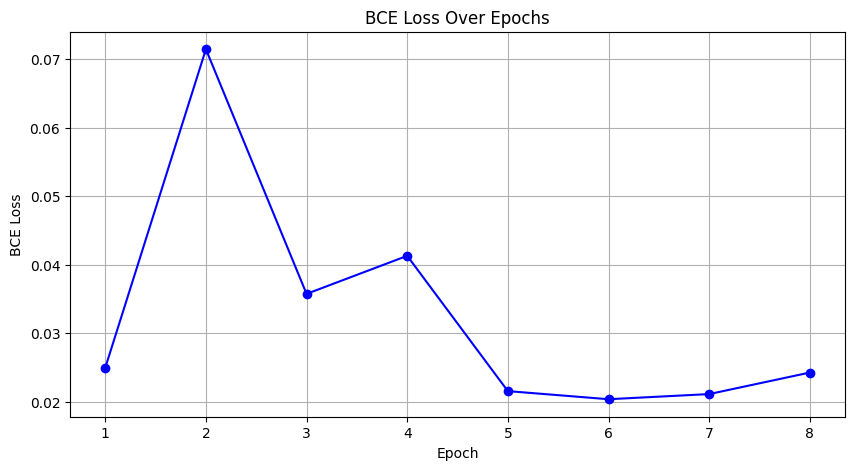

In [43]:
# Plotting the loss
epochs_list = list(range(1, epochs + 1))
loss_values = [loss_set[epoch] for epoch in range(epochs)]

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, loss_values, marker='o', linestyle='-', color='b')
plt.title('BCE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.grid(True)
plt.show()

In [44]:
# Now lets save our trained model
# save the trained model
torch.save(model_net5, 'model_net5.pkl')

In [45]:

# Lets load the model for inference

model_net5_trained = torch.load('model_net5.pkl')

# Set the Model to Evaluation Mode
model_net5_trained.eval()


Sequential(
  (0): Linear(in_features=13, out_features=20, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=20, out_features=20, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=20, out_features=1, bias=True)
  (7): Sigmoid()
)

# Evaluating the Final Model on the Test Data


In [46]:

# Initialize a variable to store the total loss
total_loss = 0.0

# Initialize a variable to store all the predictions
all_predictions = []

# Loop over each sample in the test dataset
for i in range(X_test_tensor.size(0)):

    # Forward pass: compute predicted y by passing x to the model
    output = model_net5(X_test_tensor[i].reshape(-1))

    # Compute and print loss
    loss = loss_BCE(output, y_test_tensor[i].reshape(-1))
    total_loss += loss.item()

    # Store the predictions
    all_predictions.append(output.detach().numpy())

# Calculate the average loss over all test samples
average_loss = total_loss / X_test_tensor.size(0)
print(f'Average Loss on Test Set: {average_loss:.4f}')

# Convert all_predictions to a tensor for further calculations
all_predictions_tensor = torch.tensor(all_predictions).squeeze()

Average Loss on Test Set: 6.6749


<ipython-input-46-8b9984601040>:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  all_predictions_tensor = torch.tensor(all_predictions).squeeze()


In [47]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[   5 5456]
 [   0  785]]


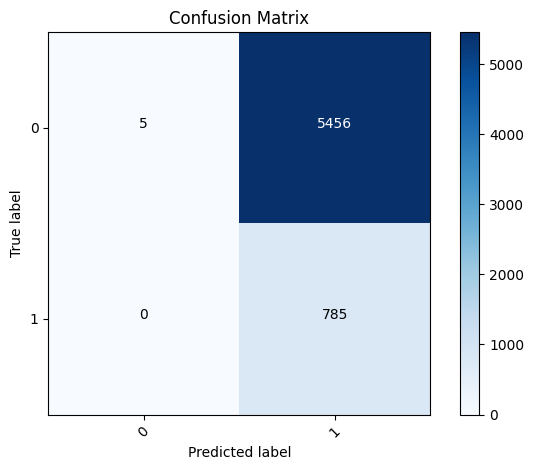

In [48]:

# Convert predicted probabilities to binary labels
threshold = 0.70
predicted_labels = (all_predictions_tensor > threshold).long()

# Calculate confusion matrix
cm = confusion_matrix(y_test_tensor.numpy(), predicted_labels.numpy())

# Plot confusion matrix
plot_confusion_matrix(cm, classes=[0, 1], title='Confusion Matrix')
plt.show()


In [49]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.12648094780659622